In [1]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

import sys
sys.path.append('..')

import src as odyn

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable

In [2]:
odyn.OpinionNetworkModel

src.simulations.OpinionNetworkModel

# Initialize Model

Models are initialized in four different configurations where heighbor connections are determined by

* opinion proximity
* weight
* distance 
* opinion proximity, weight and distance (i.e. the full ODyN model)

We'll begin by setting our choice of model parameters.

In [3]:
proportion_willing = .5
proportion_hesitant = .5
p = [proportion_willing, proportion_hesitant]

gamma = 1.5
b = 1.5
alpha = 2
delta = 8
lam = 1/10

In [4]:
model = odyn.OpinionNetworkModel(
                probabilities = p, 
                power_law_exponent = gamma,
                openness_to_neighbors = b,
                openness_to_influencers = 1.5,
                distance_scaling_factor = lam,
                importance_of_weight = alpha, 
                importance_of_distance = delta,
                include_opinion = True,
                include_weight = True,
                include_distance = True
                           )

Agents will be seeded with with beliefs, weights, and mega influence connections and place on an equliateral triangle with side length 1000.

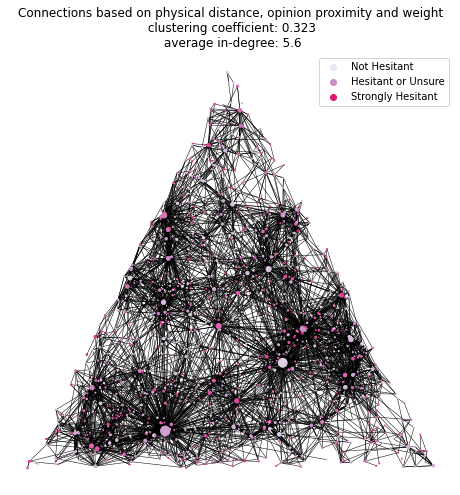

In [5]:
num_agents = 1000
model.populate_model(num_agents = num_agents, show_plot = True)

# Run Simulation

Next we will run the model according the speficied parameters.  The simulation will stop when the rolling average net change in agent beliefs crosses below some threshold.

In [6]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model, stopping_thresh = 0.01, show_plot = False, store_results = False)

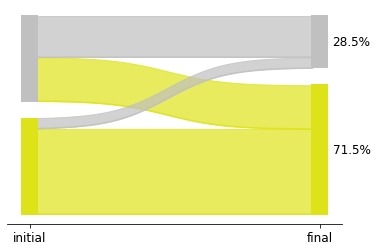

In [7]:
fig, ax = plt.subplots()
odyn.get_alluvial_plot_axis(ax = ax,
                            dynamic_belief_df = sim.dynamic_belief_df, 
                            vaccination_threshold = -10, #we ignore this for now
                            hesitant_threshold = 0)
plt.show()

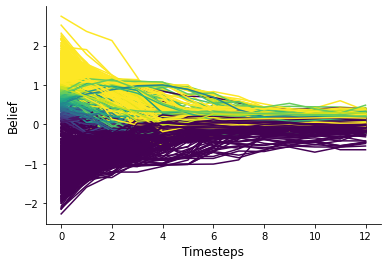

In [8]:
fig, ax = plt.subplots()
odyn.get_line_plot_axis(ax = ax, dynamic_belief_df = sim.dynamic_belief_df)
plt.show()

# Initialize Model with Geography

Another option is to load a model with vaccine belief proportions taken directly from CDC data.  In what follows we demonstrate this workflow for Multnomah, OR.

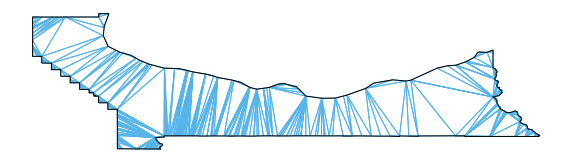

In [10]:
geo_df = odyn.get_county_mapping_data(county = "Multnomah", state = "OR")
odyn.plot_triangulated_county(geo_df)

It's also possible to select for small bounded geographic regions using a bounding_box. For example, we could focus on only the upper right corner of the county.

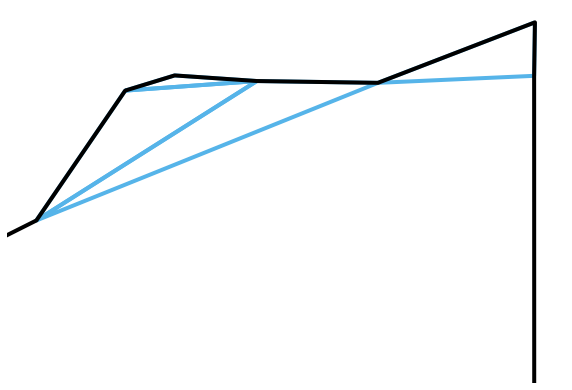

In [11]:
bounding_box = [[-121.965, 45.62], 
                [-121.92, 45.62], 
                [-121.92, 45.65], 
                [-121.965, 45.65], 
                [-121.965, 45.62]]

odyn.plot_triangulated_county(geo_df, 
                              bounding_box = bounding_box,
                              restricted = True)

County mapping data will include area, population estimates, mapping coordinates, and vaccine hesitancy estimates for the county and state. Data for Montgomery, AL and Multnomah, OR has been preloaded so it will run quickly, other counties will download data directly from the [CDC website](https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw), which might take a few minutes. From here we can read the probabilities of the three relevant modes

* -1, not vaccine hesitant
* 0, hesitant or unsure
* 1, strongly hesitant

More information about the meaning of these modes can be found in the [ASPE Report of June 16th, 2021](https://aspe.hhs.gov/reports/vaccine-hesitancy-covid-19-state-county-local-estimates). Since it will be helpful in what follows, hesitancy rates can be loaded directly from the geo_df as a dictionary.

In [12]:
hesitancy_dict = odyn.get_hesitancy_dict(geo_df)
probability = list(hesitancy_dict.values())

A model can be initialized by supplying only the list of probabilities for the desired modes.

In [13]:
model = odyn.OpinionNetworkModel(probabilities = probability,
                                include_weight = True,
                                include_opinion = True,
                                importance_of_weight = 0.1,
                                importance_of_distance = 9)

There are several options for populating the model with agents. One option is to add the agents using the geodata already stored in geo_df (this will include the coordinates for relevant triangles as well as recorded population densities).

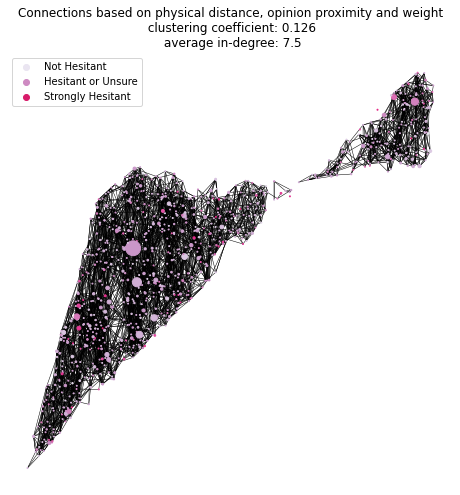

In [15]:
# Populate model.
model.populate_model_with_geography(geo_df = geo_df, 
                     bounding_box = bounding_box)

# Plot initial network.
model.plot_initial_network()

In [16]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model, stopping_thresh = 0.01, show_plot = False, store_results = False)

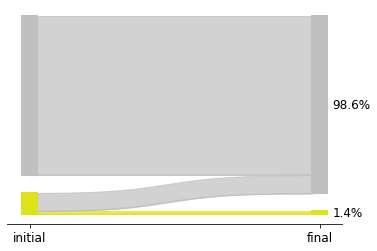

In [17]:
fig, ax = plt.subplots()
odyn.get_alluvial_plot_axis(ax = ax,
                            dynamic_belief_df = sim.dynamic_belief_df, 
                            vaccination_threshold = -10, #we ignore this for now
                            hesitant_threshold = 0)
plt.show()

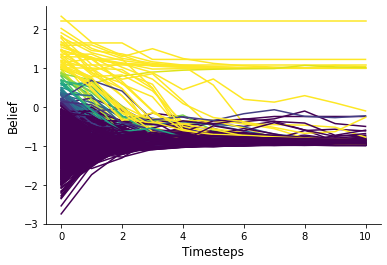

In [18]:
fig, ax = plt.subplots()
odyn.get_line_plot_axis(ax = ax, dynamic_belief_df = sim.dynamic_belief_df)
plt.show()

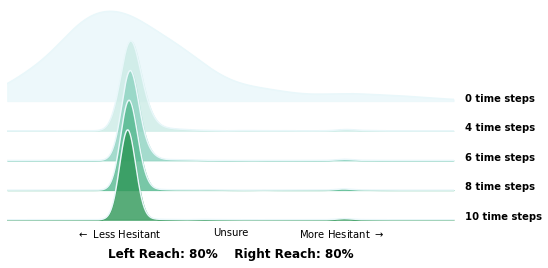

In [19]:
sim.plot_simulation_results()